# LinearSVM

In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris["data"][:, [2, 3]]
y = (iris["target"]==2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(x,y )

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

# Nonlinear classification

In [2]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

x, y = make_moons(n_samples=1000, noise=0.3)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [3]:
polynomial_svm_clf.fit(x,y)

C:\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [4]:
data_1 = x[:, 0]

In [5]:
data_2 = x[:, 1]

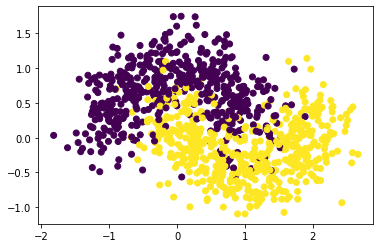

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
x_asis = [x for x in range(len(data_1))]
figure, axes = plt.subplots()
axes.scatter(data_1, data_2, c=y)
plt.show()

# Polynomial Kernel

## Making something that is called a "Kernel Trick"

In [7]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"C" : [1, 2, 4, 8, 16, 32, 64]}, 
    {"kernel": ["poly"]},
    {"degree": [1, 2, 4, 8, 16, 32, 64]},
    {"coef0" : [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]}]

svm_clf = SVC()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_scaled, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 2, 4, 8, 16, 32, 64]}, {'kernel': ['poly']},
                         {'degree': [1, 2, 4, 8, 16, 32, 64]},
                         {'coef0': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1.0]}],
             scoring='accuracy')

In [25]:
svm_clf = grid_search.best_estimator_

In [26]:
 grid_search.best_params_

{'C': 2}

In [27]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", svm_clf)
])

poly_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=2))])

In [28]:
from sklearn.metrics import accuracy_score

y_hat = poly_kernel_svm_clf.predict(x)
accuracy_score(y, y_hat)

0.908

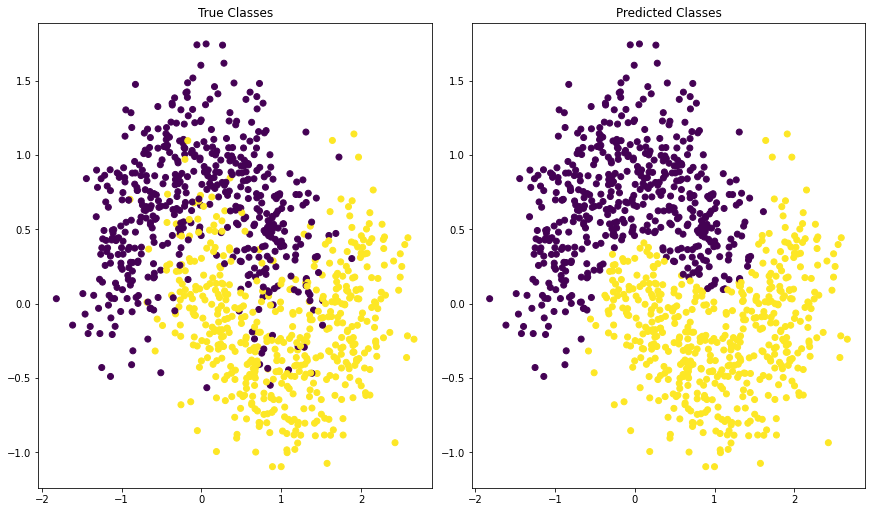

In [29]:
x_asis = [x for x in range(len(data_1))]

figure, axs = plt.subplots(1, 2, figsize=(12, 7), layout="constrained")
axs[0].scatter(data_1, data_2, c=y)
axs[1].scatter(data_1, data_2, c=y_hat)
axs[0].set_title("True Classes")
axs[1].set_title("Predicted Classes")
plt.savefig("MPL.png")

# Similarity Features

## Gaussian RBF Kernel

In [31]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

# SVM regression

In [37]:
from sklearn.svm import LinearSVR

svm_reg= LinearSVR(epsilon=1.5)
svm_reg.fit(x, y)

LinearSVR(epsilon=1.5)

In [41]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(x, y)

SVR(C=100, degree=2, kernel='poly')